# PROJECT-03

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/customer_segmentation_data.csv')
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


### Getting Data Statistics

In [3]:
df.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [5]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Geographic Information,0
Occupation,0
Income Level,0
Behavioral Data,0
Purchase History,0


In [7]:
df.shape

(53503, 20)

### EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox

### Univariate Analysis

<Axes: xlabel='Age', ylabel='Count'>

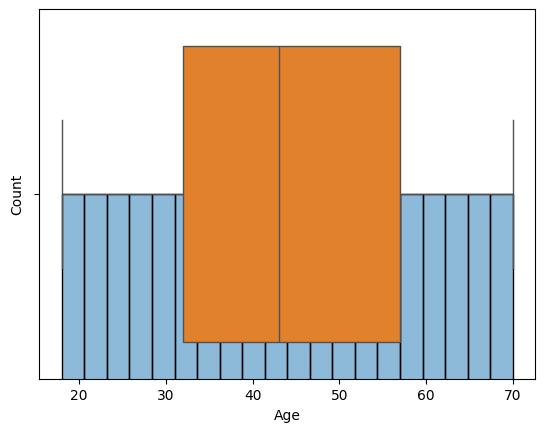

In [9]:
sns.histplot(df['Age'], bins=20, kde=True)
sns.boxplot(x=df['Age'])


<Axes: xlabel='Gender', ylabel='count'>

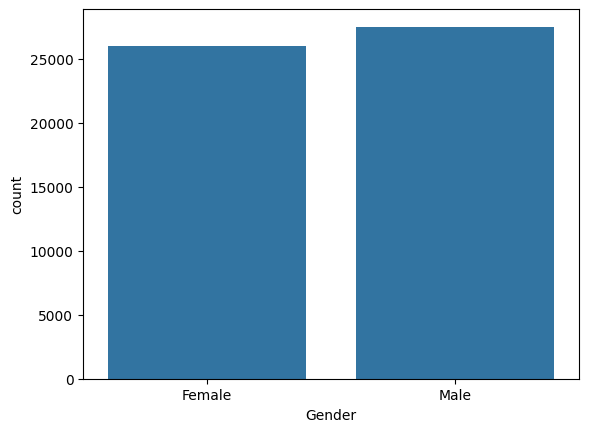

In [10]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Premium Amount', ylabel='Count'>

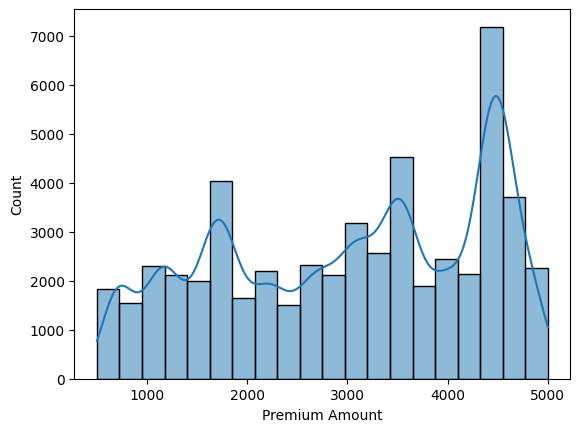

In [11]:
sns.histplot(df['Premium Amount'], bins=20, kde=True)

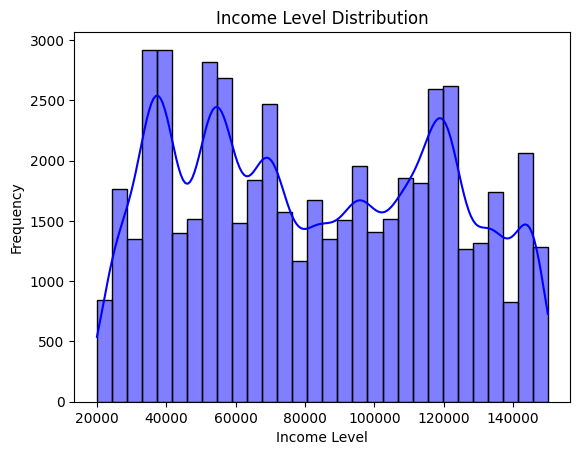

In [14]:
sns.histplot(df['Income Level'], bins=30, kde=True, color='blue')
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.show()

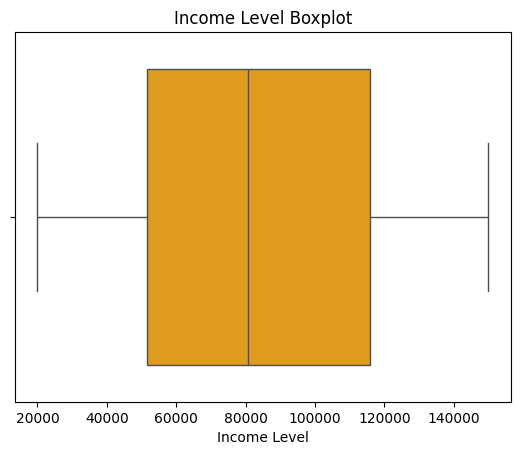

In [15]:
sns.boxplot(x=df['Income Level'], color='orange')
plt.title('Income Level Boxplot')
plt.xlabel('Income Level')
plt.show()

In [17]:
skewness_value = skew(df['Income Level'])
print(f"Skewness of Income Level: {skewness_value}")
if abs(skewness_value) > 1:
    df['Income Level (Log)'] = np.log1p(df['Income Level'])  # Apply log transformation
    print("Applied log transformation to reduce skewness.")

    # Visualize the transformed data
    sns.histplot(df['Income Level (Log)'], bins=30, kde=True, color='green')
    plt.title('Transformed Income Level Distribution')
    plt.xlabel('Log(Income Level)')
    plt.ylabel('Frequency')
    plt.show()



Skewness of Income Level: 0.1093992530380067


In [18]:
Q1 = df['Income Level'].quantile(0.25)
Q3 = df['Income Level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers_removed = df[(df['Income Level'] >= lower_bound) & (df['Income Level'] <= upper_bound)]
print(f"Number of records after removing outliers: {len(outliers_removed)}")


Number of records after removing outliers: 53503


In [19]:
print("Original Skewness:", skewness_value)
print("Transformed Skewness:", skew(outliers_removed['Income Level']))


Original Skewness: 0.1093992530380067
Transformed Skewness: 0.1093992530380067


### Bivariate Analysis

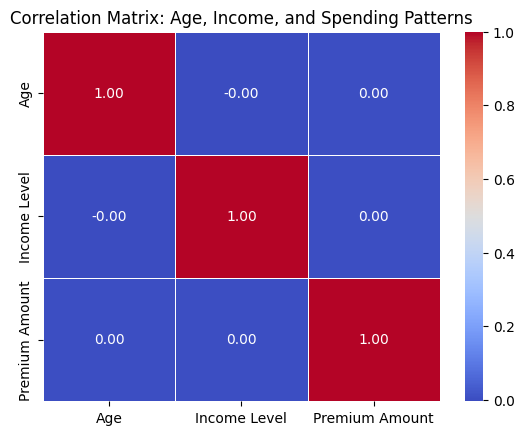

In [22]:
# Select numerical columns
numerical_cols = ['Age', 'Income Level', 'Premium Amount']

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Age, Income, and Spending Patterns')
plt.show()


<ipython-input-23-94cc2dffee3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Premium Amount', data=gender_spending, palette='viridis')


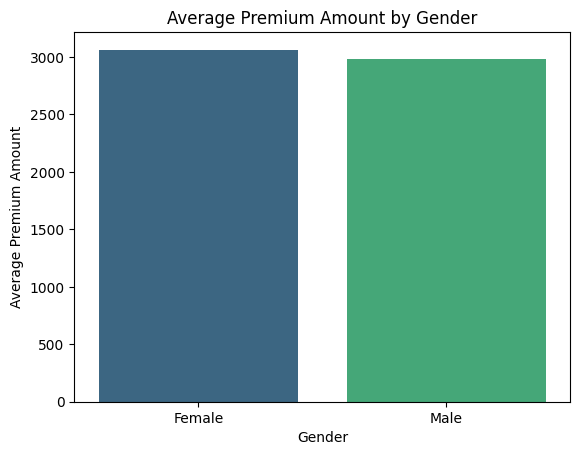

In [23]:
gender_spending = df.groupby('Gender')['Premium Amount'].mean().reset_index()

# Bar plot
sns.barplot(x='Gender', y='Premium Amount', data=gender_spending, palette='viridis')
plt.title('Average Premium Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Premium Amount')
plt.show()


<ipython-input-24-d59edc0c4d67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Premium Amount', data=df, palette='muted', split=True)


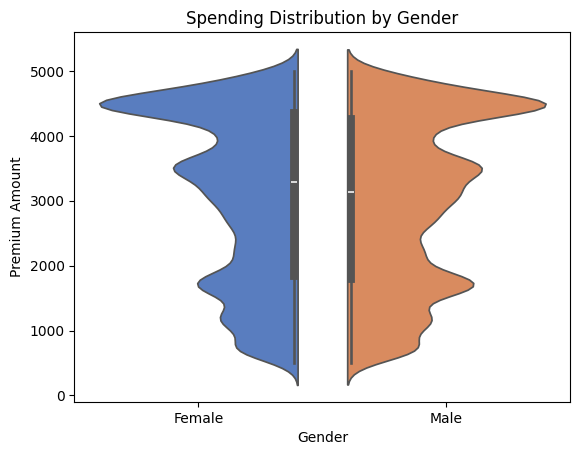

In [24]:
sns.violinplot(x='Gender', y='Premium Amount', data=df, palette='muted', split=True)
plt.title('Spending Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Premium Amount')
plt.show()


### categorical Analysis

<ipython-input-27-f8a54c815043>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital Status', data=df, palette='pastel')


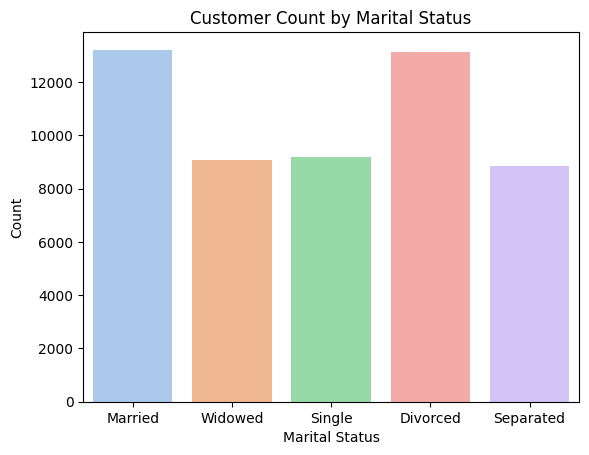

In [27]:
# Count plot for Marital Status
sns.countplot(x='Marital Status', data=df, palette='pastel')
plt.title('Customer Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


<ipython-input-28-376ce13cac89>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='viridis')


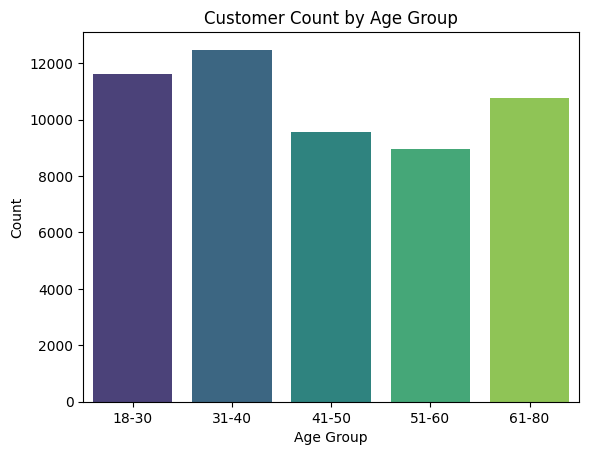

In [28]:
# Create age bins
age_bins = [18, 30, 40, 50, 60, 80]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-80']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Count plot for Age Group
sns.countplot(x='Age Group', data=df, palette='viridis')
plt.title('Customer Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


<ipython-input-29-e94b749cab57>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Policy Type', y='Premium Amount', data=spending_by_policy, palette='coolwarm')


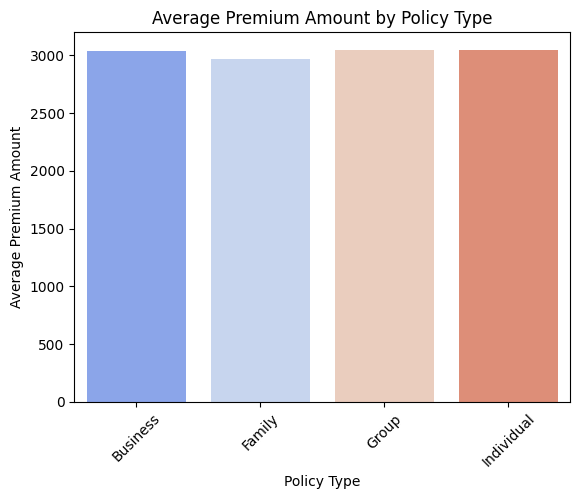

In [29]:
spending_by_policy = df.groupby('Policy Type')['Premium Amount'].mean().reset_index()

# Bar plot
sns.barplot(x='Policy Type', y='Premium Amount', data=spending_by_policy, palette='coolwarm')
plt.title('Average Premium Amount by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Average Premium Amount')
plt.xticks(rotation=45)
plt.show()


### 5. Visualizations

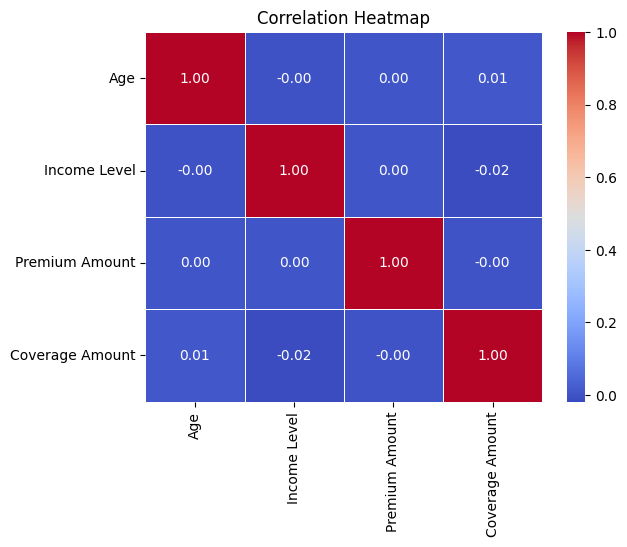

In [31]:
# Select relevant columns
correlation_columns = ['Age', 'Income Level', 'Premium Amount', 'Coverage Amount']
correlation_matrix = df[correlation_columns].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


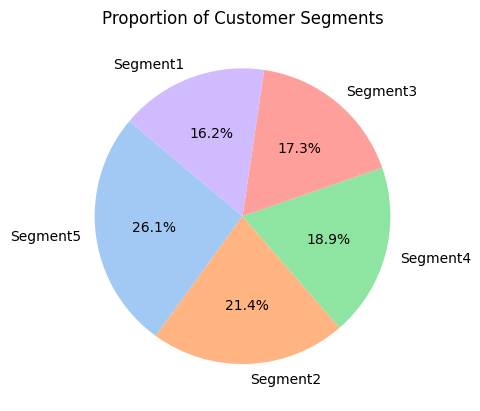

In [32]:
df['Segmentation Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Proportion of Customer Segments')
plt.ylabel('')  # Hide y-axis label
plt.show()
